# DS1003 Machine Learning HW1 Code 
## Zian Jiang

## Q1

Since it is indepedent from the traing set, the validation set is used to compare performances of different parameters and decide to select a model among different models and prevent overfitting. If the model is trained by the training set only, without the validation set, the model may get 100\% accuracy and overfit. We need validation set to see the generalization of the model.

## Q2: Transforming data

In [1]:
! pip install pandas

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
  Using cached pandas-1.0.1-cp37-cp37m-manylinux1_x86_64.whl (10.1 MB)
  Using cached pytz-2019.3-py2.py3-none-any.whl (509 kB)


In [2]:
import os
import sys
import collections
import re
import copy
import pandas as pd
import numpy as np

In [3]:
with open('spam_train.txt','r') as text_file:
    corpus = text_file.readlines()

In [4]:
len(corpus)

5000

In [5]:
train_raw = corpus[:4000]
val_raw = corpus[4000:]

In [6]:
temp_train_labels = [int(text[0]) for text in train_raw]
temp_val_labels = [int(text[0]) for text in val_raw]

In [7]:
train_labels = [1 if label else -1 for label in temp_train_labels]
val_labels = [1 if label else -1 for label in temp_val_labels]

In [8]:
train_raw = [text[2:-2] for text in train_raw]
val_raw = [text[2:-2] for text in val_raw]

In [9]:
MIN_FREQUENCY = 30

In [10]:
from tqdm.notebook import tqdm

In [11]:
train_labels = np.asarray(train_labels)
val_labels = np.asarray(val_labels)

In [13]:
def build_vocab(corpus,min_frequency):
    vocab = {}
    for email in tqdm(corpus):
        for token in set(email.split(" ")):
            if token in vocab:
                vocab[token] += 1
            else:
                vocab[token] = 1
    temp = {key:val for key,val in vocab.items() if val >= min_frequency}    
    vocab_list = [key for key,val in temp.items()]
    return vocab_list
vocab = build_vocab(train_raw,MIN_FREQUENCY)

In [14]:
len(vocab)

2376

In [17]:
def vectorize(corpus,vocab):
    vecs = []
    for email in tqdm(corpus):
        tokens = email.split(" ")
        sent_vec = []
        for word in vocab:
            if word in tokens:
                sent_vec.append(1)
            else:
                sent_vec.append(0)
        vecs.append(sent_vec)
    return np.asarray(vecs)
X_train = vectorize(train_raw,vocab)
X_val = vectorize(val_raw,vocab)

## Q3: Perceptron implementation

In [18]:
def perceptron_train(data,y):
    n,d = data.shape
    w = np.zeros(d)
    k = 0
    iter_ = 0
    while True:
        temp = 0
        for row_idx in tqdm(range(data.shape[0])):
            data_point = data[row_idx]
            if sum(data_point) != 0:
                if y[row_idx] * w.dot(data_point) <= 0:
                    temp += 1
                    k += 1
                    w += y[row_idx] * data_point
        if temp == 0:
            return w,k,iter_
        else:
            iter_ += 1
        
def perceptron_test(w,data,y):
    num_errors = 0
    for row_idx in range(data.shape[0]):
        data_point = data[row_idx]
        if y[row_idx] * w.dot(data_point) < 0:
            num_errors += 1
    return float(num_errors/y.shape[0])

## Q4

In [19]:
w,num_mistakes,num_passes = perceptron_train(X_train,train_labels)
print(num_mistakes," mistakes were made before the algorithm terminated.")


425  mistakes were made before the algorithm terminated.


In [20]:
print("Training error: ", perceptron_test(w,X_train,train_labels))

Training error:  0.0


In [21]:
print("Validation error: ",perceptron_test(w,X_val,val_labels))

Validation error:  0.019


## Q5

In [24]:
print("15 words with most positive weights: ", [vocab[i] for i in w.argsort()[::-1][:15]])

15 words with most positive weights:  ['sight', 'click', 'our', 'remov', 'deathtospamdeathtospamdeathtospam', 'guarante', 'compani', 'sincer', 'yourself', 'present', 'internet', 'market', 'pleas', 'her', 'basenumb']


In [25]:
print("15 words with most negative weights: ", [vocab[i] for i in w.argsort()[:15]])

15 words with most negative weights:  ['wrote', 'which', 'i', 're', 'prefer', 'messag', 'chang', 'set', 'turn', 'review', 'someth', 'on', 'recipi', 'view', 'run']


## Q6

In [26]:
def averaged_perceptron(data,y):
    n,d = data.shape
    w = np.zeros(d)
    a = np.zeros(d)
    k = 0
    iter_ = 0
    count = 0
    while True:
        temp = 0
        for row_idx in tqdm(range(data.shape[0])):
            data_point = data[row_idx]
            if sum(data_point) != 0:
                if y[row_idx] * w.dot(data_point) <= 0:
                    temp += 1
                    k += 1
                    w += y[row_idx] * data_point
                    a += w
                    count += 1
                else:
                    a += w
                    count += 1
        if temp == 0:
            return a/count,k,iter_
        else:
            iter_ += 1

a,num_mistakes,num_passes = averaged_perceptron(X_train,train_labels)
print(num_mistakes," mistakes were made before the algorithm terminated.")
print("Validation error: ",perceptron_test(a,X_val,val_labels))


425  mistakes were made before the algorithm terminated.
Validation error:  0.018


## Q7

In [28]:
import matplotlib.pyplot as plt
N = [100, 200, 400, 800, 2000, 4000]
p_errors = []
avg_errors = []
p_epochs = []
avg_epochs = []

for n in tqdm(N):
    print("Training N = ",n)
    
    train_raw_ = train_raw[:n]
    val_raw_ = train_raw[n:] + val_raw
    train_labels_ = train_labels[:n]
    val_labels_ = np.concatenate((train_labels[n:],val_labels))
    vocab = build_vocab(train_raw,MIN_FREQUENCY)
    
    X_train = vectorize(train_raw_,vocab)
    X_val = vectorize(val_raw_,vocab)
    
    a,num_mistakes,num_passes = averaged_perceptron(X_train,train_labels_)
    avg_errors.append(perceptron_test(a,X_val,val_labels_))
    avg_epochs.append(num_passes)
    
    w,num_mistakes_,num_passes_ = perceptron_train(X_train,train_labels_)
    p_errors.append(perceptron_test(w,X_val,val_labels_))
    p_epochs.append(num_passes_)

Training N =  100



Training N =  200



Training N =  400



Training N =  800



Training N =  2000



Training N =  4000


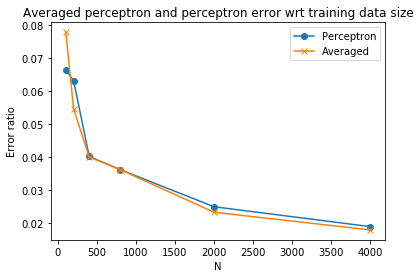

In [29]:
def plot_val_error(p_errors,avg_errors,N):
    plt.plot(N,p_errors,"o-",label = "Perceptron")
    plt.plot(N,avg_errors,"-x",label = "Averaged")
    plt.xlabel("N")
    plt.ylabel("Error ratio")
    plt.legend()
    plt.title("Averaged perceptron and perceptron error wrt training data size")
    
%matplotlib inline    
plot_val_error(p_errors,avg_errors,N)

## Q8

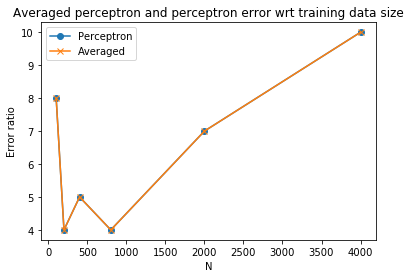

In [30]:
def plot_epochs(p_epochs,avg_epochs,N):
    plt.plot(N,p_epochs,"o-",label = "Perceptron")
    plt.plot(N,avg_epochs,"-x",label = "Averaged")
    plt.xlabel("N")
    plt.ylabel("Epochs")
    plt.legend()
    plt.title("Averaged perceptron and perceptron epochs wrt training data size")
    
%matplotlib inline    
plot_val_error(p_epochs,avg_epochs,N)

## Q9

In [31]:
def averaged_perceptron(data,y,MAX_ITER):
    n,d = data.shape
    w = np.zeros(d)
    a = np.zeros(d)
    k = 0
    iter_ = 0
    count = 0
    for _ in range(MAX_ITER):
        temp = 0
        for row_idx in tqdm(range(data.shape[0])):
            data_point = data[row_idx]
            if sum(data_point) != 0:
                if y[row_idx] * w.dot(data_point) <= 0:
                    temp += 1
                    k += 1
                    w += y[row_idx] * data_point
                    a += w
                    count += 1
                else:
                    a += w
                    count += 1
        if temp == 0:
            return a/count,k,iter_
        else:
            iter_ += 1        
    return a/count,k,iter_
            
    
def perceptron_train(data,y,MAX_ITER):
    n,d = data.shape
    w = np.zeros(d)
    k = 0
    iter_ = 0
    for _ in range(MAX_ITER):
        temp = 0
        for row_idx in tqdm(range(data.shape[0])):
            data_point = data[row_idx]
            if sum(data_point) != 0:
                if y[row_idx] * w.dot(data_point) <= 0:
                    temp += 1
                    k += 1
                    w += y[row_idx] * data_point
        if temp == 0:
            return w,k,iter_
        else:
            iter_ += 1        
    return w,k,iter_

In [32]:
MAX_ITERS = range(1,11)
p_errors = []
avg_errors = []

for MAX_ITER in MAX_ITERS:
    print("Training with max number of iterations: ", MAX_ITER)
    w,_,_ = perceptron_train(X_train,train_labels,MAX_ITER)
    p_errors.append(perceptron_test(w,X_val,val_labels))
    a,_,_ = averaged_perceptron(X_train,train_labels,MAX_ITER)
    avg_errors.append(perceptron_test(a,X_val,val_labels))


Training with max number of iterations:  1



Training with max number of iterations:  2



Training with max number of iterations:  3



Training with max number of iterations:  4



Training with max number of iterations:  5



Training with max number of iterations:  6



Training with max number of iterations:  7



Training with max number of iterations:  8



Training with max number of iterations:  9



Training with max number of iterations:  10


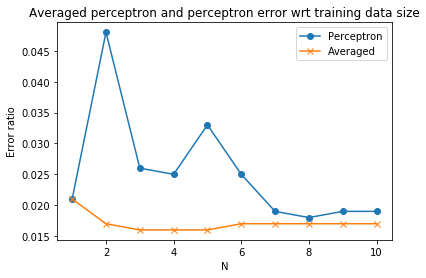

In [33]:
plot_val_error(p_errors,avg_errors,MAX_ITERS)

In [34]:
print("The best setup is Averaged Perceptron with max 8 passes of the data, which achieves error on validation set: ", avg_errors[7])

The best setup is Averaged Perceptron with max 8 passes of the data, which achieves error on validation set:  0.017


## Q11

In [39]:
with open('spam_test.txt','r') as text_file:
    corpus = text_file.readlines()

temp_test_labels = [int(text[0]) for text in corpus]
test_labels = [1 if label else -1 for label in temp_test_labels]

test_raw = [text[2:-2] for text in corpus]

vocab = build_vocab(train_raw,MIN_FREQUENCY)
X_test = vectorize(test_raw,vocab)
X_train = vectorize(train_raw,vocab)

In [40]:
a,_,_ = averaged_perceptron(X_train,train_labels,8)

In [41]:
print("Test set error: ", perceptron_test(a,X_test,np.array(test_labels)))

Test set error:  0.019
